## 1. Word Cloud

1. Generate a word cloud based on the raw corpus -- I recommend you to use the Python word_cloud library. With the help of nltk (already available in your Anaconda environment), implement a standard text pre-processing pipeline (e.g., tokenization, stopword removal, stemming, etc.) and generate a new word cloud. Discuss briefly the pros and cons (if any) of the two word clouds you generated.

In [13]:
import pandas as pd
import nltk
from nltk.book import FreqDist
import os
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

## Creating the Text File

Taking only Hillary's email body text

In [9]:
emails = pd.read_csv('hillary-clinton-emails/Emails.csv')
emails = emails.ExtractedBodyText.dropna()
emails.to_csv('emails.txt')

## Loading the Text File

In [18]:
d = os.getcwd()
emails = open(path.join(d, 'emails.txt')).read()

## Word Clouds

There are four Word Clouds, raw, stopwords removed, stemming, and specific email words removed

### Tokenizing and Getting Word-Freq Pair

In [19]:
emails_tokenized = nltk.tokenize.word_tokenize(emails) # tokenizing
fdist = FreqDist(emails_tokenized) # word-freq tuples

### Raw Word Cloud

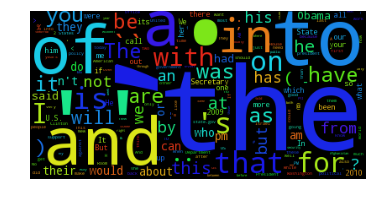

In [22]:
# Read the whole text.
wordcloud = WordCloud(max_words=200,stopwords=None).fit_words(fdist.items())
# Open a plot of the generated image.

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Word Cloud, Stopwords Removed

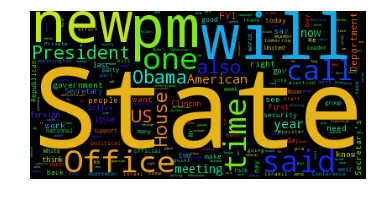

In [23]:
wordcloud = WordCloud(max_words=200).generate(emails)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Word Cloud, Stopwords Removed, Stemmed


In [41]:
from helpers import preprocess_pipeline

ImportError: cannot import name 'preprocess_pipeline'

In [32]:
email_text1 = open(path.join(d, 'emails1.txt')).read()
email_text2 = open(path.join(d, 'emails2.txt')).read()
email_text3 = open(path.join(d, 'emails3.txt')).read()
email_text4 = open(path.join(d, 'emails4.txt')).read()

In [40]:
email_ppd1 = h.preprocess_pipeline(email_text1, "english", "PorterStemmer", True, True, False) # does not return as string, instead returns

AttributeError: module 'helpers' has no attribute 'preprocess_pipeline'

In [25]:
from nltk import PorterStemmer
def stemming(words_list, encoding="utf8"):
    stemmed_list = []
    stemmer = PorterStemmer()
    for word in words_list:
        stemmed_list.append(stemmer.stem(word).encode(encoding))
        for word in words_list:
            stemmed_list.append(stemmer.stem(word).encode(encoding))
    return stemmed_list


def pre_process(string)
    l = []
    words = []
    sentences = tokenize(str)
    for sentence in sentences:
		words = stemming(words, stemmer_type)
# 		print(words)
		words = [word.decode("utf-8") for word in words]
# 		print(words)
		if return_as_str:
			l.append(" ".join(words))
		else:
			l.append(words)
	if return_as_str:
		return " ".join(l)